* Source blog: https://pieriantraining.com/confusion-matrix-with-scikit-learn-and-python/

##### Confusion Matrix:
A confusion matrix is a table used to evaluate the performance of a machine learning algorithm. It shows how many samples were correctly or incorrectly classified by the algorithm in each class.

The confusion matrix has two dimensions: actual and predicted. In binary classification, where there are only two classes (positive and negative), it looks like this:

|             | Predicted +ve | Predicted -ve |
| ----------- | ------------- | --------- |
| Actual +ve| True +ve (TP) | False -ve (FN)|
| Actual -ve  | False +ve (FP)| True -ve (TN) |

Let’s consider a binary classification problem where we have two classes, “Positive” and “Negative”.

###### True Positive (TP): 
This is when the model correctly predicts that an instance belongs to the positive class when it actually does. In other words, TP refers to the number of positive instances that are correctly predicted as positive by the model.

###### True Negative (TN): 
This is when the model correctly predicts that an instance belongs to the negative class when it actually does. In other words, TN refers to the number of negative instances that are correctly predicted as negative by the model.

###### False Positive (FP): 
This is when the model incorrectly predicts that an instance belongs to the positive class when it actually belongs to the negative class. In other words, FP refers to the number of negative instances that are incorrectly predicted as positive by the model.

###### False Negative (FN): 
This is when the model incorrectly predicts that an instance belongs to the negative class when it actually belongs to the positive class. In other words, FN refers to the number of positive instances that are incorrectly predicted as negative by the model.


##### Confusion Matrix Use Cases:
A confusion matrix is a commonly used tool in machine learning to evaluate the performance of a classification model. Here are some real-world or business use cases where a confusion matrix can be helpful:

* Fraud Detection: A bank uses a machine learning model to identify fraudulent transactions. The confusion matrix helps the bank understand how well the model is performing by showing the number of true positives, true negatives, false positives, and false negatives.
* Medical Diagnosis: A hospital uses a machine learning model to diagnose patients with a certain disease. The confusion matrix helps doctors understand how accurate the model is by showing the number of true positives, true negatives, false positives, and false negatives.
* Customer Churn Prediction: A company uses a machine learning model to predict which customers are likely to churn (stop using their service). The confusion matrix helps the company understand how well the model is performing by showing the number of true positives, true negatives, false positives, and false negatives.
* Sentiment Analysis: A social media platform uses a machine learning model to analyze user comments and determine if they are positive or negative. The confusion matrix helps the platform understand how accurate the model is by showing the number of true positives, true negatives, false positives, and false negatives.
* Image Classification: An e-commerce website uses a machine learning model to automatically classify product images into different categories like apparel or electronics. The confusion matrix helps them understand how well their image classification algorithm is performing by showing the number of true positives, true negatives, false positives and false negatives for each category.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [13]:
# Load the breast cancer dataset
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)

In [15]:
# Train a logistic regression model on the training data
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
# Predict the test data using the trained model
y_pred = model.predict(X_test)

In [17]:
# Calculate the confusion matrix of predicted vs actual values
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[51  2]
 [ 6 84]]


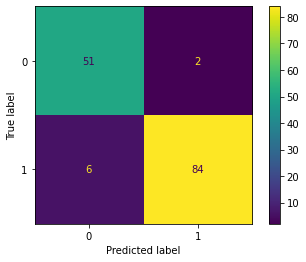

In [18]:
# Plot the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)

Based on the Confusion Matrix we can calcluate various accuracy measures. Each of the below measure is relevent for different contexts & applications.

##### 1) Accuracy measures
is the ratio of correctly classified samples to the total number of samples in the dataset.
###### Accuracy = (Number of correctly classified samples) / (Total number of samples)

For example, if we have a dataset with 1000 samples and our model correctly classifies 900 out of those 1000 samples, then the accuracy of our model would be:

Accuracy = 900/1000 = 0.9 or 90%

In other words, our model has an accuracy rate of 90%, meaning that it is able to correctly classify 90% of the samples in the dataset.

While accuracy is a commonly used metric for evaluating classification models, it may not always be the best metric to use. For instance, if we have an imbalanced dataset where there are significantly more examples from one class than another, then even a simple model that always predicts the majority class will have high accuracy but may not be useful in practice. Therefore, it’s important to consider other metrics such as precision and recall alongside accuracy when evaluating classification models.

##### 2) Precision
is the ratio of true positive samples to all the predicted positive samples.
###### Precision = (True positives) / (True positives + False positives)

where True positives are the number of correctly classified positive samples and False positives are the number of negative samples that were incorrectly classified as positive.

For example, if our model has predicted 100 samples as positive out of which 80 are actually positive and 20 are negative, then the precision of our model would be:

Precision = 80/(80+20) = 0.8 or 80%

This means that out of all the samples our model predicted as positive, it was able to correctly classify 80% of them as truly positive.

Precision is an important metric when we want to avoid false positives. For instance, in a medical diagnosis scenario where we want to identify patients who have a particular disease, we may want to ensure that we don’t falsely classify healthy patients as having the disease. In such cases, we would aim for a high precision value.

However, optimizing for high precision may lead to low recall (the ability to detect all relevant cases), and vice versa. Therefore, it’s important to consider both metrics together when evaluating classification models.

##### 3) Recall
measures how well a model is able to correctly identify all positive samples from the total number of positive samples in the dataset. It is defined as the ratio of true positive samples to all positive samples.
###### Recall = (True positives) / (True positives + False negatives)

where True positives are the number of correctly classified positive samples and False negatives are the number of positive samples that were incorrectly classified as negative.

For example, if our model has correctly identified 80 out of 100 positive samples in our dataset and missed 20 positive cases, then the recall value would be:

Recall = 80/(80+20) = 0.8 or 80%

This means that our model was able to correctly identify 80% of all the actual positive cases in our dataset.

Recall is an important metric when we want to avoid false negatives. For instance, in a medical diagnosis scenario where we want to identify patients who have a particular disease, we may want to ensure that we don’t miss any patients who actually have the disease. In such cases, we would aim for a high recall value.

##### 4) F1-Score
combines both precision and recall into a single score. It is the harmonic mean of precision and recall, and provides a balance between the two metrics.

###### F1-score = 2 * ((Precision * Recall) / (Precision + Recall))

where Precision is the ratio of true positive samples to all predicted positive samples, and Recall is the ratio of true positive samples to all actual positive samples.

For example, if our model has precision of 0.8 (80%) and recall of 0.85 (85%), then the F1-score would be:

F1-score = 2((0.80.85)/(0.8+0.85)) = 0.82 or 82%

This means that our model has an overall performance score of 82%, which takes into account both precision and recall.

F1-score is useful when we want to have a balance between precision and recall, especially in cases where both false positives and false negatives are equally important to avoid. For instance, in spam email classification where we want to avoid classifying legitimate emails as spam (false positive) as well as missing out on actual spam emails (false negative), we would aim for a high F1-score value.